<a href="https://colab.research.google.com/github/eteh1/Oil-Spill-Modeling/blob/main/Oil%20spill%20modeling%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1
Statistics at Step 1: {'total_oil': 3200.0, 'max_concentration': 300.0, 'min_concentration': 15.0}


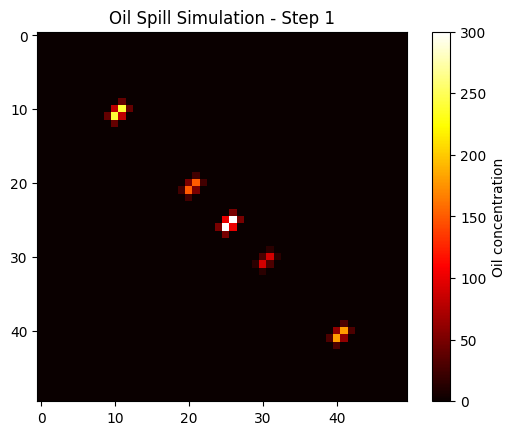

Step 2
Statistics at Step 2: {'total_oil': 3200.0, 'max_concentration': 210.0, 'min_concentration': 0.75}


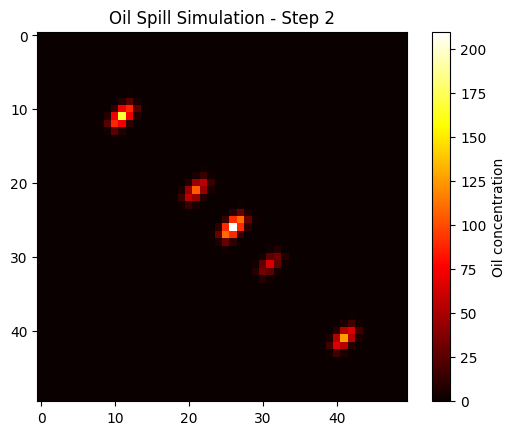

Step 3
Statistics at Step 3: {'total_oil': 3200.0, 'max_concentration': 126.0, 'min_concentration': 0.037500000000000006}


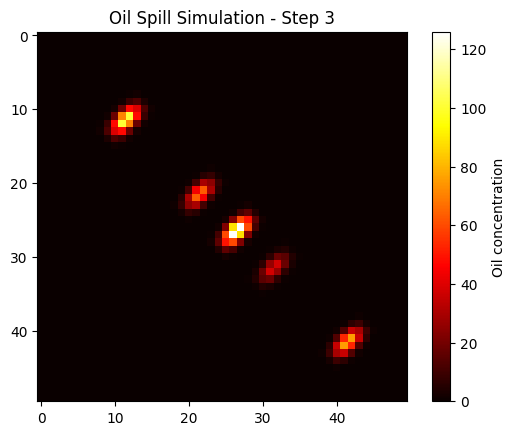

Step 4
Statistics at Step 4: {'total_oil': 3200.0, 'max_concentration': 105.225, 'min_concentration': 0.0018750000000000004}


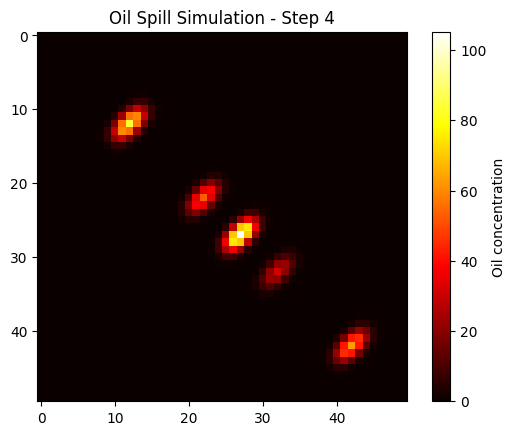

Step 5
Statistics at Step 5: {'total_oil': 3199.99925, 'max_concentration': 78.63749999999999, 'min_concentration': 9.375000000000003e-05}


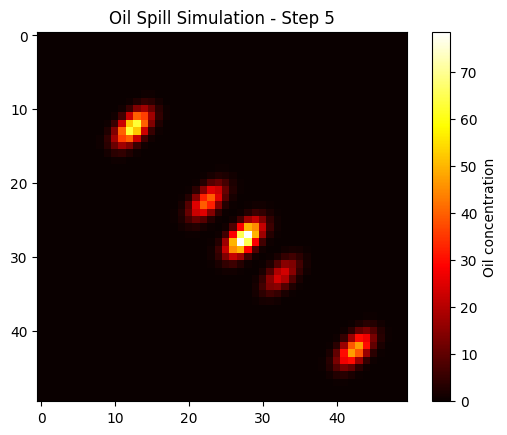

Step 6
Statistics at Step 6: {'total_oil': 3199.9688375, 'max_concentration': 70.15124999999999, 'min_concentration': 4.687500000000002e-06}


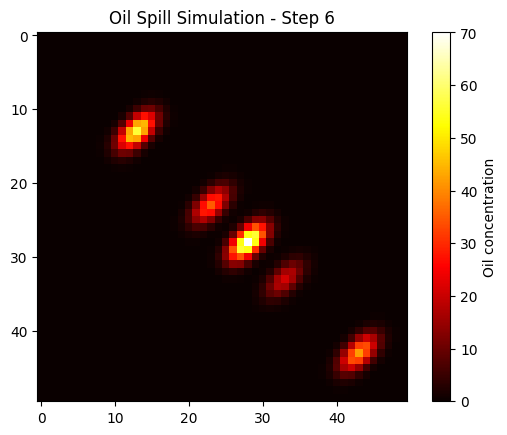

Step 7
Statistics at Step 7: {'total_oil': 3199.7307874999997, 'max_concentration': 57.301649999999995, 'min_concentration': 2.343750000000001e-07}


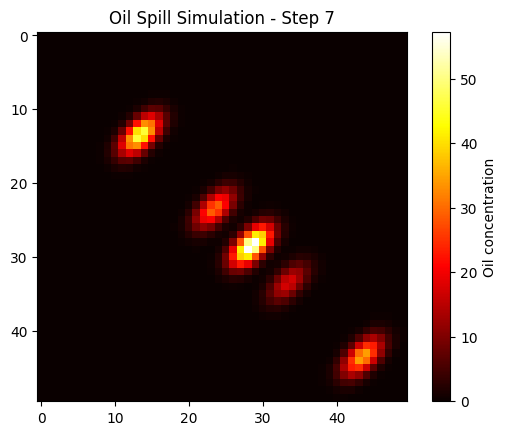

Step 8
Statistics at Step 8: {'total_oil': 3198.8724737187495, 'max_concentration': 52.696261406249995, 'min_concentration': 1.1718750000000007e-08}


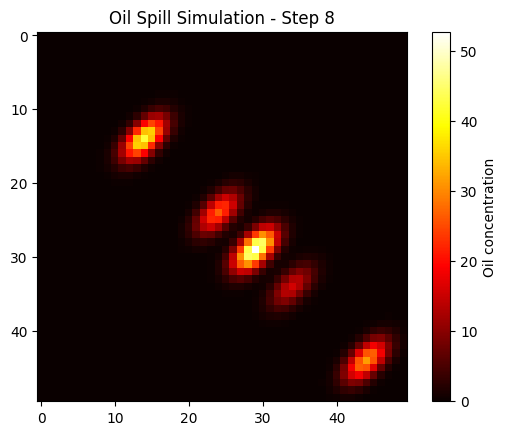

Step 9
Statistics at Step 9: {'total_oil': 3196.959771321875, 'max_concentration': 45.110115421874994, 'min_concentration': 5.859375000000004e-10}


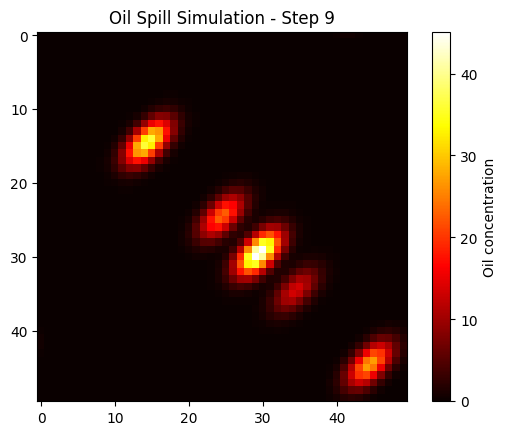

Step 10
Statistics at Step 10: {'total_oil': 3193.908457016367, 'max_concentration': 42.215235854374995, 'min_concentration': 1.2695312500000008e-10}


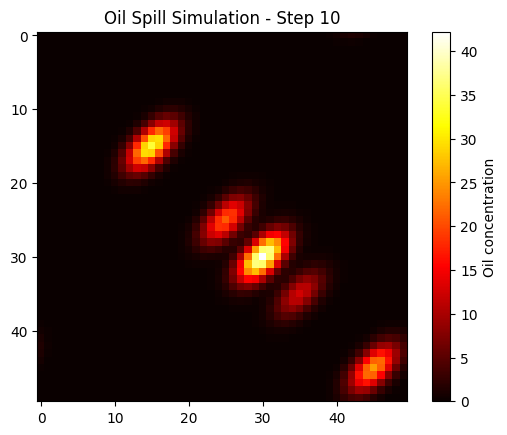

Step 11
Statistics at Step 11: {'total_oil': 3190.1521185798088, 'max_concentration': 37.20534989428125, 'min_concentration': 2.9296875000000023e-11}


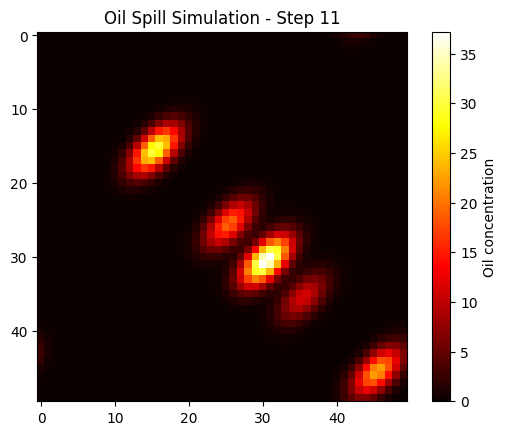

Step 12
Statistics at Step 12: {'total_oil': 3186.525254345403, 'max_concentration': 35.21697387381328, 'min_concentration': 1.4648437500000012e-12}


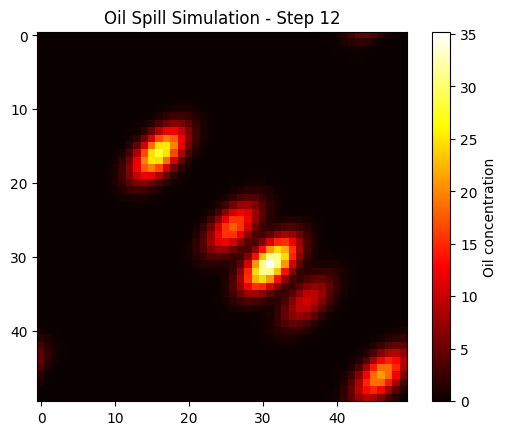

Step 13
Statistics at Step 13: {'total_oil': 3184.010839527201, 'max_concentration': 31.661497797482106, 'min_concentration': 6.591796875000003e-13}


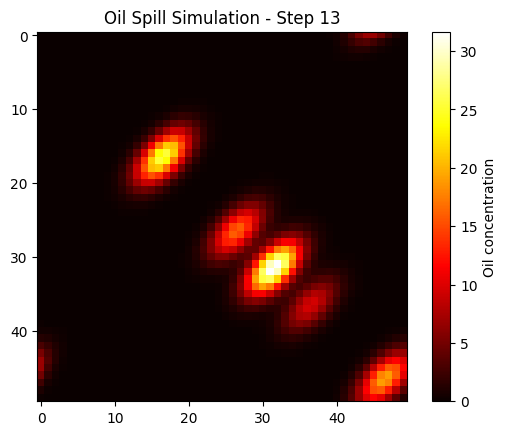

Step 14
Statistics at Step 14: {'total_oil': 3183.399860796706, 'max_concentration': 30.212201150550804, 'min_concentration': 9.775390625000006e-13}


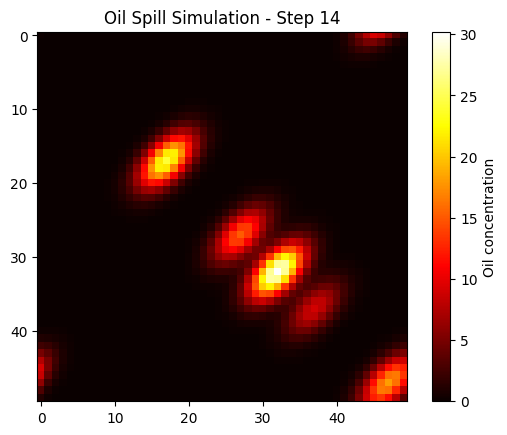

Step 15
Statistics at Step 15: {'total_oil': 3184.8419386850337, 'max_concentration': 27.559014584860456, 'min_concentration': 1.3747558593750006e-13}


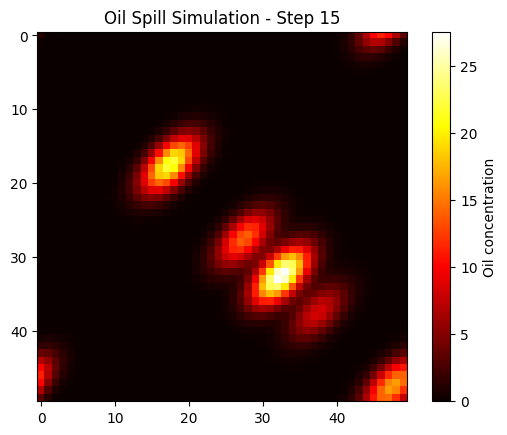

Step 16
Statistics at Step 16: {'total_oil': 3187.6038076841373, 'max_concentration': 26.457113950102663, 'min_concentration': 1.555908203125001e-14}


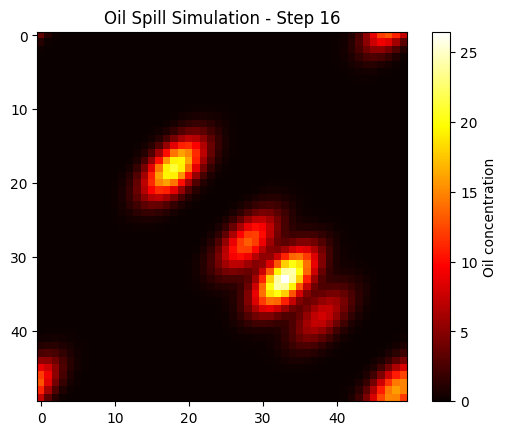

Step 17
Statistics at Step 17: {'total_oil': 3190.504545814726, 'max_concentration': 24.40286396056945, 'min_concentration': 1.7229309082031261e-15}


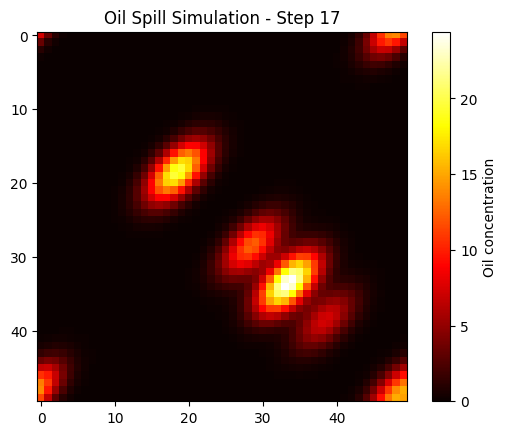

Step 18
Statistics at Step 18: {'total_oil': 3192.7857757776865, 'max_concentration': 23.538591848051045, 'min_concentration': 5.080413818359379e-16}


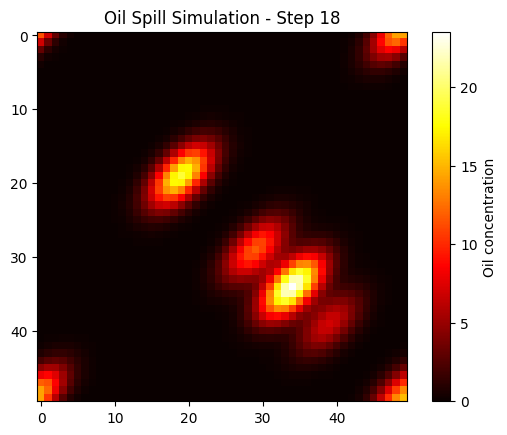

Step 19
Statistics at Step 19: {'total_oil': 3194.526501197449, 'max_concentration': 21.902669908945242, 'min_concentration': 2.5402069091796896e-17}


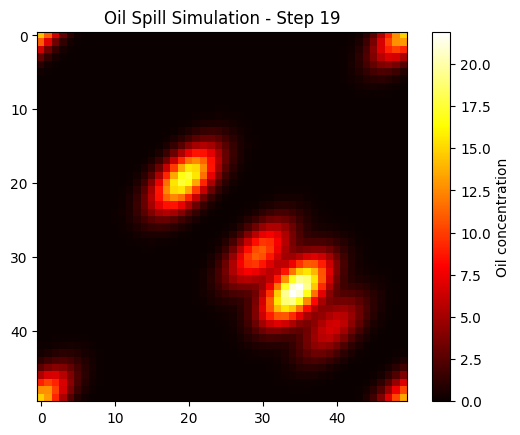

Step 20
Statistics at Step 20: {'total_oil': 3196.2529454645255, 'max_concentration': 21.208531334583533, 'min_concentration': 3.4237670898437523e-18}


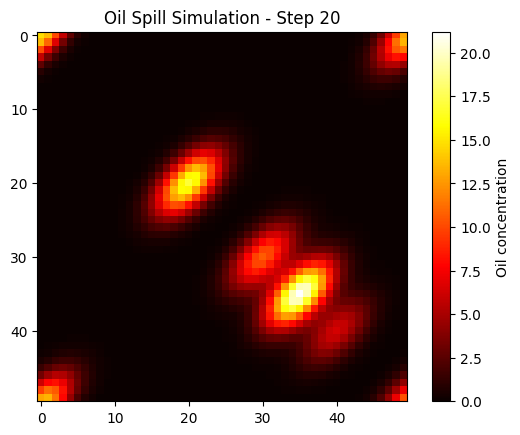

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class OilSpillSimulation:
    def __init__(self, grid_size, diffusion_rate, wind_speed, current_speed):
        self.grid_size = grid_size
        self.diffusion_rate = diffusion_rate
        self.wind_speed = wind_speed
        self.current_speed = current_speed
        self.grid = np.zeros((grid_size, grid_size))

    def add_spill(self, location, amount):
        x, y = location
        self.grid[x, y] += amount

    def diffuse(self):
        new_grid = np.copy(self.grid)
        for i in range(1, self.grid_size - 1):
            for j in range(1, self.grid_size - 1):
                diffusion = self.diffusion_rate * (
                    self.grid[i - 1, j] + self.grid[i + 1, j] +
                    self.grid[i, j - 1] + self.grid[i, j + 1] -
                    4 * self.grid[i, j]
                )
                new_grid[i, j] += diffusion
        self.grid = new_grid

    def advect(self):
        wind_effect = np.roll(self.grid, shift=int(self.wind_speed), axis=1)
        current_effect = np.roll(self.grid, shift=int(self.current_speed), axis=0)
        self.grid = (wind_effect + current_effect) / 2

    def step(self):
        self.diffuse()
        self.advect()

    def plot(self, step):
        plt.imshow(self.grid, cmap='hot', interpolation='nearest')
        plt.colorbar(label='Oil concentration')
        plt.title(f'Oil Spill Simulation - Step {step}')
        plt.show()

    def get_statistics(self):
        total_oil = np.sum(self.grid)
        max_concentration = np.max(self.grid)
        min_concentration = np.min(self.grid[self.grid > 0]) if np.any(self.grid > 0) else 0
        return {
            'total_oil': total_oil,
            'max_concentration': max_concentration,
            'min_concentration': min_concentration
        }

# Example with synthetic data
def run_simulation_with_synthetic_data():
    # Synthetic dataset
    data = pd.DataFrame({
        "x": [25, 20, 30, 10, 40],  # Spill locations (x-coordinates)
        "y": [25, 20, 30, 10, 40],  # Spill locations (y-coordinates)
        "amount": [1000, 500, 300, 800, 600],  # Spill amounts
        "wind_speed": [1, 1, 1, 1, 1],  # Uniform wind speed
        "current_speed": [1, 1, 1, 1, 1]  # Uniform current speed
    })

    grid_size = 50
    diffusion_rate = 0.1

    # Create the simulation object
    wind_speed = data['wind_speed'].iloc[0]
    current_speed = data['current_speed'].iloc[0]
    simulation = OilSpillSimulation(grid_size, diffusion_rate, wind_speed, current_speed)

    # Add spills from data
    for _, row in data.iterrows():
        location = (int(row['x']), int(row['y']))
        amount = row['amount']
        simulation.add_spill(location, amount)

    # Simulate for 20 steps
    steps = 20
    for step in range(steps):
        print(f"Step {step + 1}")
        simulation.step()
        stats = simulation.get_statistics()
        print(f"Statistics at Step {step + 1}: {stats}")
        simulation.plot(step + 1)

if __name__ == "__main__":
    run_simulation_with_synthetic_data()
